In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install missingno
import missingno as msno
from datetime import date

In [3]:
# import specific sheet from excel
ads = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress')
dmg = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic')
tran = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions')

In [4]:
# Join three tables
cus = pd.merge(ads,dmg,on='customer_id')
data = pd.merge(cus,tran,on = 'customer_id')

In [5]:
# Adjust gender column, replace Femal,Female with F and Male with M
cus = cus.replace({'Female':'F','Femal':'F','Male':'M'})
cus = cus.replace({'New South Wales':'NSW','Victoria':'VIC'})
cus.gender.unique() # Check uniqueness
cus.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

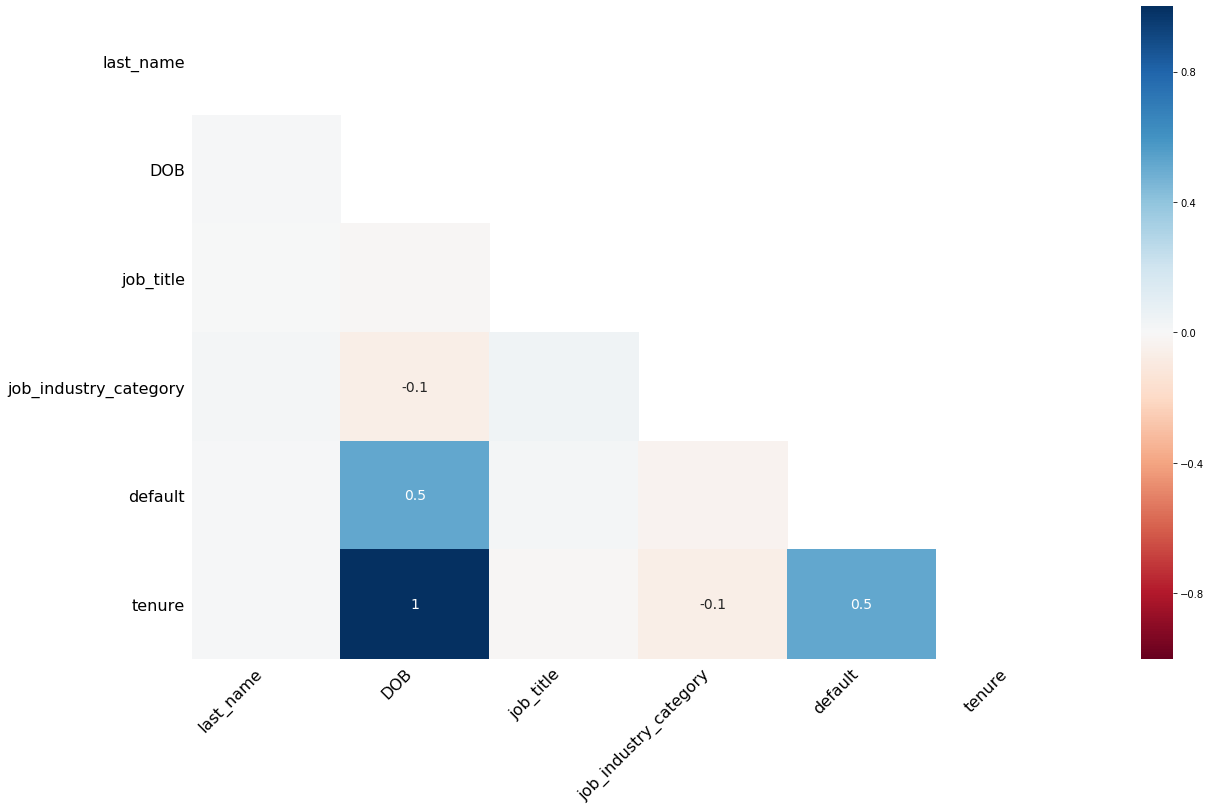

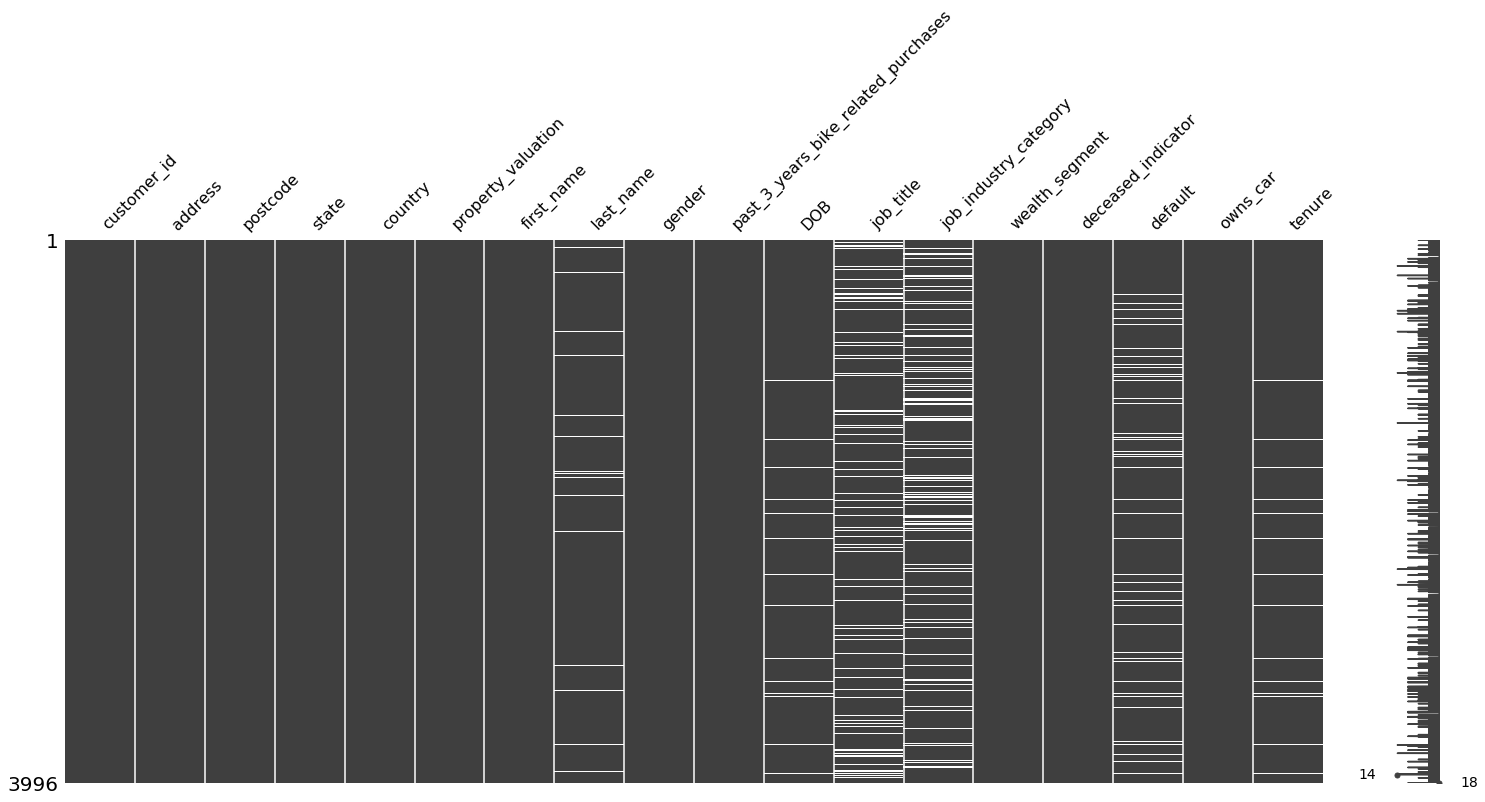

In [6]:
# Check missing values
msno.heatmap(cus)
msno.matrix(cus) 
# References
# https://towardsdatascience.com/visualize-missing-values-with-missingno-ad4d938b00a1

In [7]:
cus.isna().sum() # Check NaN for each variable

customer_id                              0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

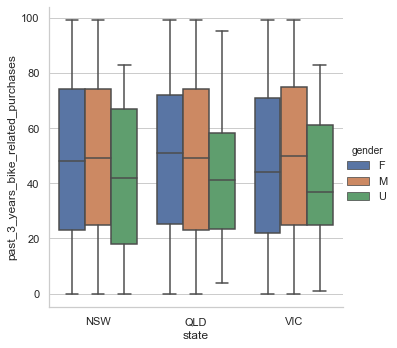

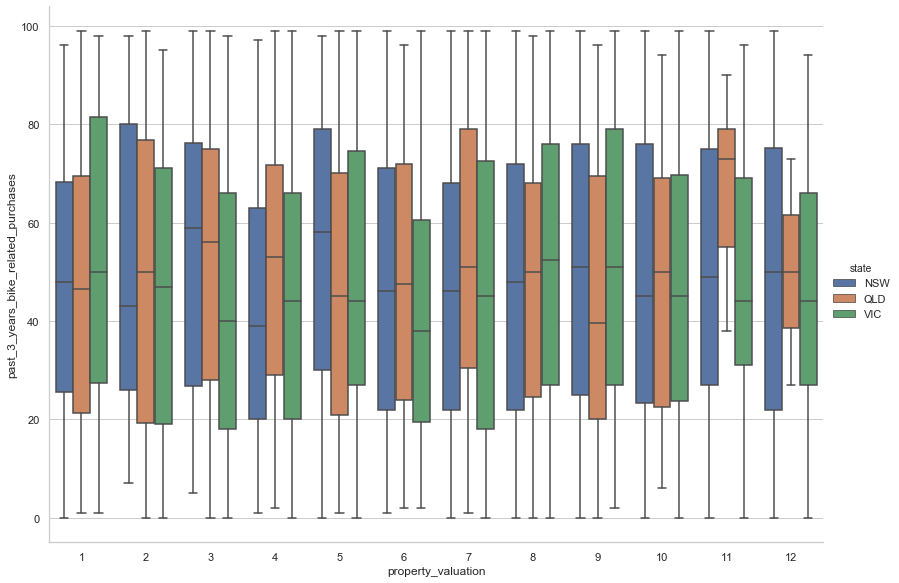

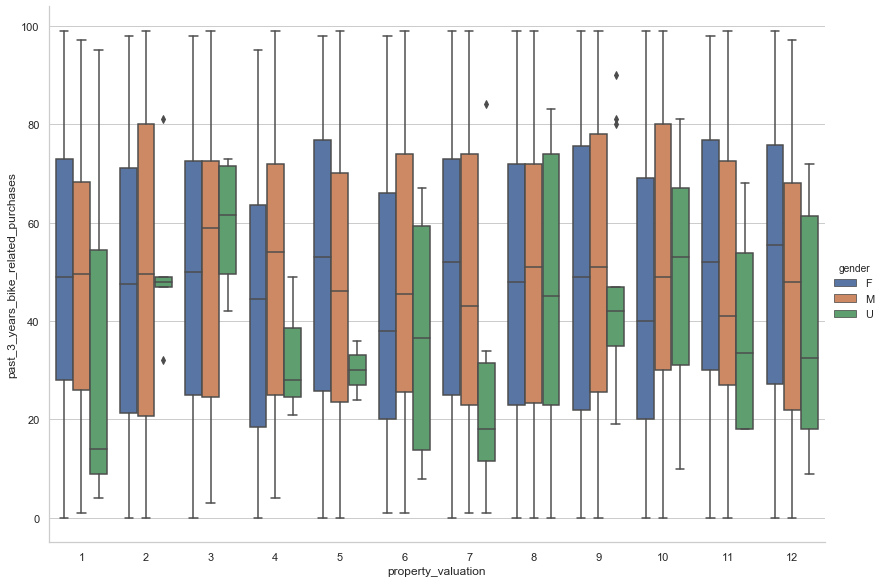

KeyError: 'age'

In [8]:
sns.set(style="whitegrid")
sns.catplot(x = 'state',y = 'past_3_years_bike_related_purchases',hue = 'gender',
            data = cus, kind="box")
plt.show()

sns.catplot(x = 'property_valuation',y = 'past_3_years_bike_related_purchases',hue = 'state',
            data = cus, kind = 'box',height=8.27, aspect=11.7/8.27 )
plt.show()

sns.catplot(x = 'property_valuation',y = 'past_3_years_bike_related_purchases',hue = 'gender',
            data = cus, kind = 'box',height=8.27, aspect=11.7/8.27 )
plt.show()

cus_age = cus[cus['age'] <= 100].dropna()
sns.jointplot(x = 'age',y = 'past_3_years_bike_related_purchases',kind = 'kde',data = cus_age)


In [9]:
def age(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 

(array([174., 216., 219., 176., 228., 226., 310., 555., 400., 244., 205.,
        213., 275., 214., 186.,  62.,   0.,   0.,   2.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 18.  ,  21.16,  24.32,  27.48,  30.64,  33.8 ,  36.96,  40.12,
         43.28,  46.44,  49.6 ,  52.76,  55.92,  59.08,  62.24,  65.4 ,
         68.56,  71.72,  74.88,  78.04,  81.2 ,  84.36,  87.52,  90.68,
         93.84,  97.  , 100.16, 103.32, 106.48, 109.64, 112.8 , 115.96,
        119.12, 122.28, 125.44, 128.6 , 131.76, 134.92, 138.08, 141.24,
        144.4 , 147.56, 150.72, 153.88, 157.04, 160.2 , 163.36, 166.52,
        169.68, 172.84, 176.  ]),
 <a list of 50 Patch objects>)

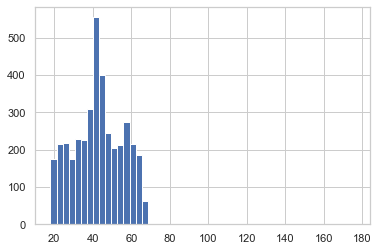

In [10]:
# Create new column with customer ages
cus['age'] = cus['DOB'].apply(age)
# https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/
plt.hist(cus['age'].dropna(),bins = 50)